<a href="https://colab.research.google.com/github/surbhi-145/ArtificialIntelligence/blob/master/NeuralNetwork/3_Layers_NN_for_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Training the Neural Network**

In [7]:
import numpy as np
import scipy.special 
import matplotlib.pyplot as plt 
%matplotlib inline

In [8]:
class NeuralNetwork:

  def __init__(self, inputnodes, hiddennodes,outputnodes,learningrate):
    self.inodes = inputnodes
    self.hnodes = hiddennodes
    self.onodes = outputnodes

    self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
    self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

    self.lr = learningrate
    self.activation_function = lambda x : scipy.special.expit(x)
    self.inverse_activation_function = lambda x: scipy.special.logit(x)
    pass

  def train(self, inputs_list, targets_list):

    inputs = np.array(inputs_list, ndmin =2).T
    targets = np.array(targets_list, ndmin= 2).T

    hidden_inputs = np.dot(self.wih, inputs)
    hidden_outputs = self.activation_function(hidden_inputs)

    final_inputs = np.dot(self.who, hidden_outputs)
    final_outputs = self.activation_function(final_inputs)

    output_errors = targets - final_outputs
    hidden_errors = np.dot(self.who.T, output_errors)

    self.who += self.lr * np.dot((output_errors * final_outputs * (1.0-final_outputs)), np.transpose(hidden_outputs))
    self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0-hidden_outputs)), np.transpose(inputs))
    pass
  
  def query(self, inputs_list):
  
    inputs = np.array(inputs_list, ndmin=2).T

    hidden_inputs = np.dot(self.wih, inputs)
    hidden_outputs = self.activation_function(hidden_inputs)

    final_inputs = np.dot(self.who, hidden_outputs)
    final_outputs = self.activation_function(final_inputs)

    return final_outputs
  
  def backquery(self, targets_list):

    final_outputs = np.array(targets_list, ndmin = 2).T
    final_inputs = self.inverse_activation_function(final_outputs)

    # calculate the signal out of the hidden layer
    hidden_outputs = np.dot(self.who.T, final_inputs)
    # scale them back to 0.01 to .99
    hidden_outputs -= np.min(hidden_outputs)
    hidden_outputs /= np.max(hidden_outputs)
    hidden_outputs *= 0.98
    hidden_outputs += 0.01
        
    # calculate the signal into the hidden layer
    hidden_inputs = self.inverse_activation_function(hidden_outputs)
        
    # calculate the signal out of the input layer
    inputs = np.dot(self.wih.T, hidden_inputs)
    # scale them back to 0.01 to .99
    inputs -= np.min(inputs)
    inputs /= np.max(inputs)
    inputs *= 0.98
    inputs += 0.01
        
    return inputs
    

We train our model for each pixel . Therefore input_nodes are 784 (28 x 28) and the output nodes are 10, which is for each digit. The choice for number of nodes in the hidden layer is arbitary. It should be lesser than input nodes, so that we are trying to summarise the feautures in each layer. 

In [9]:
#Initialise
input_nodes = 784
hidden_nodes = 200
output_nodes = 10
learning_rate= 0.1

n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [10]:
#Load Data 
training_data_file = open('sample_data/mnist_train_small.csv', 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [11]:
#Train the Neural Network 
#epoch is the number of times you train your model 
epoch = 5
for e in range(epoch): 
  for record in training_data_list:
    all_values = record.split(',')
    inputs = (np.asfarray(all_values[1:])/255 * 0.99) + 0.01
    targets = np.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    n.train(inputs,targets)
    pass
  pass

In [12]:
#Test
test_data_file = open('mnist_test.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

scorecard = []

for record in test_data_list:
  all_values = record.split(',')
  correct_label = int(all_values[0])
  inputs = (np.asfarray(all_values[1:])/255 * 0.99) + 0.01
  outputs = n.query(inputs)
  #index of the highest value
  label = np.argmax(outputs)
  if label==correct_label:
    scorecard.append(1)
  else:
    scorecard.append(0)
  pass

In [13]:
#Result
scorecard_array = np.asarray(scorecard)
print("Accuracy = ",  scorecard_array.sum() / scorecard_array.size)

Accuracy =  0.9649


[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


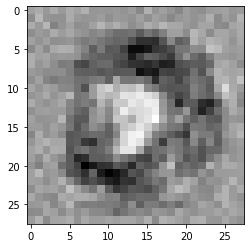

In [14]:
#Backquery


#Run for label 0
label = 0
# create the output signals for this label
targets = np.zeros(output_nodes) + 0.01
# all_values[0] is the target label for this record
targets[label] = 0.99
print(targets)

# get image data
image_data = n.backquery(targets)

# plot image data
plt.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')